# > DESCRIÇÃO DA TAREFA
## 1. Contar o número de operações dos algoritmos de ordenação por projeção e contagem
## 2. Achar a complexidade em tempo desse algoritmo
## 3. Medir o tempo em função de n
## 4. Comparar (plotar) a curva experimental com a curva teórica calibrada

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt

import numpy as np

import time

import math

# > CONFIGURAÇÃO DO PROBLEMA

In [2]:
# ALGORITMO inknown sort (para float !)

def bucket_sort(d): # otimizado
    n = len(d)
    m = min(d)
    M = max(d)

    # Cria os buckets vazios
    num_buckets = n 
    buckets = [[] for _ in range(num_buckets)]

    # Distribui os elementos nos buckets
    for num in d:
        index = math.trunc((n-1) * (num - m) / (M - m))
        buckets[index].append(num)

    # Ordena cada bucket separadamente usando o método sort()
    for bucket in buckets:
        if len(bucket)>0:
            insertion_sort(bucket)    
#             bucket.sort() # usa algum método para ordenar cada bucket
    # Concatena os elementos dos buckets em um único array
#    pythonic way: sorted_arr = [num for bucket in buckets for num in bucket]
#    normal way
    sorted_arr = []
    for bucket in buckets:
        for num in bucket:
            sorted_arr.append(num)
    
    return sorted_arr

# Algoritmo de ordenação auxiliar: Insertion Sort
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

# Função Triângulo de Pascal - worst case N^2

In [3]:
def generate_pascal_row(row_index):
    current_row = [1]
    for i in range(row_index):
        next_val = current_row[i] * (row_index - i) // (i + 1)
        current_row.append(next_val)
    return current_row

# 1. Contagem das Atribuições, Operações e Comparações (AOC)
# 2. Complexidade em tempo do algoritmo Bucket Sort

In [4]:
# ESTIMATIVA ANALÍTICA DO NÚMERO DE OPERAÇÕES (ESTRATIFICADO E TOTAL)
#---------------------------------------------------------------------------
T=[] # tempos medios para cada valor de n
n_val=[] # valores de n analisados

# Y , X valores de tempo e n dos experimentos para scatter plots
#Y =[] 
#X =[]
mn = 1
Mn = 1
stpn = 1

for n in range(mn, Mn, stpn):
    t=[]
    
    d = generate_pascal_row(math.trunc(n))
    #start study
    n = len(d)#(2,0,0)
    m = min(d)#(2,0,0)   
    M = max(d)#(2,0,0)
    #Laço 0 - cria buckets vazios em uma array de tamanho n
    num_buckets = n 
    buckets = [[] for _ in range(num_buckets)]#(n,2n,1)

    #Laço 1 - Distribui os elementos nos buckets
    for num in d:#(n,2n,1)
        index = math.trunc((n-1) * (num - m) / (M - m))#n(6,5,0)
        buckets[index].append(num)#n(3,0,0)
        
    #Laço 2 - Ordena cada bucket separadamente usando o método sort()
    for bucket in buckets:#(n,2n,1)
        if len(bucket)>0:#n(2,0,0)
            #insertion_sort(bucket)
            for i in range(1, len(bucket)):#(n,2n,1)
                key = bucket[i] #n(4,0,0)
                j = i - 1 #(3,0,1)
                while j >= 0 and bucket[j] > key:#n(3,1,2)
                    bucket[j + 1] = bucket[j]#n²(4,1,0)
                    j -= 1#=> j = j-1 -> n²(3,1,0)
                bucket[j + 1] = key#n(4,1,0)

    #Laço 3 - Concatena os elementos dos buckets em um único array  
    sorted_arr = []#(1,0,0)
    #Laço 3.1. - externo
    for bucket in buckets:#(n,2n,1)
        #Laço 3.2. - interno
        for num in bucket:#n(n,2n,1)
            sorted_arr.append(num)#n²(2,0,0)


#(2,0,0)
#(2,0,0)
#(2,0,0)
#(n,2n,1)
#(n,2n,1)
#n(6,5,0)
#n(3,0,0)
#(n,2n,1)
#(2,0,0)
#(n,2n,1)
#n(4,0,0)
#(3,0,1)
#n(3,1,2)
#n²(4,1,0)
#n²(3,1,0)
#n(4,1,0)
#(1,0,0)
#(n,2n,1)
#n(n,2n,1)
#n²(2,0,0)


#(A,O,C) = (2,0,0)+(2,0,0)+(2,0,0)+(2,0,0)+(3,0,1)+(1,0,0) + (n,2n,1)+(n,2n,1)+(n,2n,1)+(n,2n,1) + n(6,5,0)+n(3,0,0)+n(4,0,0)+n(3,1,2)+n(4,1,0)+n(n,2n,1) + n²(4,1,0) + n²(3,1,0) + n²(2,0,0)

#(A,O,C) = (2,0,0)+(2,0,0)+(2,0,0)+(2,0,0)+(3,0,1)+(1,0,0) + (n,2n,1)+(n,2n,1)+(n,2n,1)+(n,2n,1) + (6n,5n,0)+(3n,0,0)+(4n,0,0)+(3n,n,2n)+(4n,n,0)+(2n,3n,n) + n²(4,1,0) + n²(3,1,0) + n²(2,0,0)

#(A,O,C) = (12,0,1) + (4n,8n,4)+(6n,5n,0)+(3n,0,0)+(4n,0,0)+(3n,n,2n)+(4n,n,0)+(2n,3n,n) + (4n²,n²,0) + (3n²,n²,0) + (2n²,0,0)

#(A,O,C) = (12,0,1)+(26n,18n,3n+4)+(9n²,2n²,0)

#A = 9n²+26n+12
#O = 2n²+18n
#C = 3n+5

# COMPLEXIDADES: A: O(n^2), O: O(n^2), C: O(n) 

# T = A + O + C = (9n²+26n+12) + (2n²+18n) + (3n+5)
# TOTAL = 11n²+47n+17


# 3. Cálculo do tempo em função de n

In [5]:
#-----------------------------------------------------

T=[] # tempos medios para cada valor de n
n_val=[] # valores de n analisados

# Y , X valores de tempo e n dos experimentos para scatter plots
Y =[] 
X =[]
mn = 100
Mn = 10000
stpn = 100

for n in range(mn, Mn, stpn):

    print("n =",n, end=" ")
    t=[]

    rep = int(np.log(n)) # rep crescente - qto maior n, mais repetições são necessárias -> economiza tempo do teste
    # rep=1
    
    for r in range(rep):
        # d=np.random.uniform(1,int(5*n),n) #.astype('int') # minimo, maximo, num. classes < diferentes arquivos em cada ordenação
        d = generate_pascal_row(math.trunc(n))
        # print(d)
        tic=time.time()
        a = bucket_sort(d)
        toc=time.time()
        t.append(toc-tic)
        Y.append(toc-tic)
        X.append(n)
    T.append(np.mean(t))
    n_val.append(n)
    

n = 100 n = 200 n = 300 n = 400 n = 500 n = 600 n = 700 n = 800 n = 900 n = 1000 n = 1100 n = 1200 n = 1300 n = 1400 n = 1500 n = 1600 n = 1700 n = 1800 n = 1900 n = 2000 n = 2100 n = 2200 n = 2300 n = 2400 n = 2500 n = 2600 n = 2700 n = 2800 n = 2900 n = 3000 n = 3100 n = 3200 n = 3300 n = 3400 n = 3500 n = 3600 n = 3700 n = 3800 n = 3900 n = 4000 n = 4100 n = 4200 n = 4300 n = 4400 n = 4500 n = 4600 n = 4700 n = 4800 n = 4900 n = 5000 n = 5100 n = 5200 n = 5300 n = 5400 n = 5500 n = 5600 n = 5700 n = 5800 n = 5900 n = 6000 n = 6100 n = 6200 n = 6300 n = 6400 n = 6500 n = 6600 n = 6700 n = 6800 n = 6900 n = 7000 n = 7100 n = 7200 n = 7300 n = 7400 n = 7500 n = 7600 n = 7700 n = 7800 n = 7900 n = 8000 n = 8100 n = 8200 n = 8300 n = 8400 n = 8500 n = 8600 n = 8700 n = 8800 n = 8900 n = 9000 n = 9100 n = 9200 n = 9300 n = 9400 n = 9500 n = 9600 n = 9700 n = 9800 n = 9900 

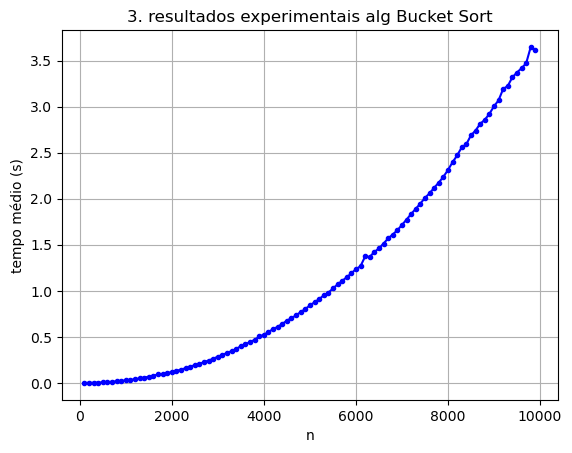

In [6]:
# plot
plt.plot(n_val,T,'b.-')
plt.title("3. resultados experimentais alg Bucket Sort")
plt.xlabel('n')
plt.ylabel('tempo médio (s)')
plt.grid()
plt.show()

# 4. Comparar a curva experimental com curva teórica calibrada

4. número de operações por segundo: 298 MFLOPS


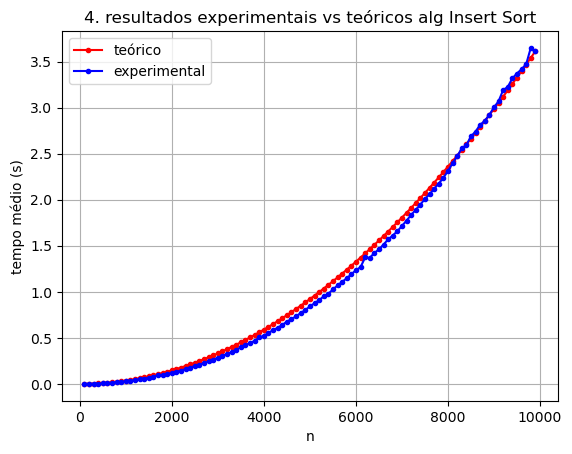

In [7]:
### Avaliação da predição teórica

def analytical_formula(n):
    Ntheo =  11*(n*n)+(47*n)+17
    Complex = n*n
    # escrever a formula para Ntheo = numero total de operações (a+0+c) e para a complexidade
    
    return Ntheo, Complex

n_value=[]
Th=[]
Tc=[]

for N in range(mn,Mn,stpn): # tarefa 4
    n_value.append(N)
    Ntheo, Complex = analytical_formula(N)
    Th.append(Ntheo) # número de operações
    Tc.append(Complex)
    
# calibração

K=Th[-1]/T[-1]
print("4. número de operações por segundo:",int(K/1e6),"MFLOPS")
# plot
plt.plot(n_value,1/K*np.array(Th),'r.-')
# Kc=Tc[-1]/T[-1]
# print("5A. número de operações por segundo por complexidade :",int(Kc/1e6),"MFLOPS")
# # plot
# plt.plot(n_value,1/Kc*np.array(Tc),'k.-')
plt.plot(n_val,T,'b.-')
plt.title("4. resultados experimentais vs teóricos alg Insert Sort")
plt.xlabel('n')
plt.ylabel('tempo médio (s)')
plt.legend(['teórico','experimental'])
plt.grid()
plt.show()

In [8]:
# erro quadrático médio 
MSE = np.sum(np.power(np.array(T)-np.array(Th/K),2))/len(T)
print('Mean Square Error - MSE=',"{:3.2g}".format(MSE),'(s^2)')
RMSE = np.sqrt(MSE)
print('Root of Mean Square Erro - RMSE=',"{:6.5f}".format(RMSE),'(s)')
NRMSE = RMSE/np.mean(Th/K)
print('Globally Normalized Root of Mean Square Erro (%) - GNRMSE=',"{:3.2f}".format(100*NRMSE),'%')
s=0
for i in range(len(T)):
    s+=np.power(K*(T[i]-Th[i]/K)/Th[i],2) 
s/=len(n_val)
LNRMSE = np.sqrt(s)
print('Locally Normalized Root of Mean Square Erro (%) - LNRMSE=',"{:3.2f}".format(100*LNRMSE),'%')

Mean Square Error - MSE= 0.0035 (s^2)
Root of Mean Square Erro - RMSE= 0.05899 (s)
Globally Normalized Root of Mean Square Erro (%) - GNRMSE= 4.82 %
Locally Normalized Root of Mean Square Erro (%) - LNRMSE= 13.01 %
